<a href="https://colab.research.google.com/github/Interaverse/Forecasting-monthly-copper-prices/blob/main/ANN_Copper_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the datasets
train_data = pd.read_excel('training_data-11.xlsx')
test_data = pd.read_excel('testing_data-11.xlsx')

# Assuming 'Copper_Price' is the column you want to use
train_scaled = train_data['Price_Copper'].values.reshape(-1,1)
test_scaled = test_data['Price_Copper'].values.reshape(-1,1)

In [ ]:
import numpy as np
#This function is optional, but it improves performance
def create_dataset(dataset, time_step=10):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # Extracting time_step consecutive elements
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])  # Corresponding future value as label
    return np.array(dataX), np.array(dataY)

# Initilize time step
time_step = 10
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

print("X_train Shape:", X_train.shape)  # Expected: (n_samples, time_step)
print("X_test Shape:", X_test.shape)    # Expected: (n_samples, time_step)


X_train Shape: (308, 10)
X_test Shape: (69, 10)


In [ ]:
from sklearn.neural_network import MLPRegressor


# Build the model
model = MLPRegressor(hidden_layer_sizes=(75,), activation='logistic', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train.ravel())



MLPRegressor(activation='logistic', hidden_layer_sizes=(75,), max_iter=1000,
             random_state=42, solver='lbfgs')

Best individual found:
  Parameters: [(145,), 'tanh', 'lbfgs']
  MSE: 0.011393658139790869

   Best Parameters: [(198,), 'logistic', 'lbfgs'], MSE: 0.010960453950255447

   Best individual found:
  Parameters: [(75,), 'logistic', 'lbfgs']
  MSE: 0.010821745280595338

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Calculate RMSE performance metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print('----------------')

# Calculate MSE performance metrics
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print('----------------')

# Calculate MAE performance metrics
train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(y_test, test_predict)
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print('----------------')

# Calculate r2 performance metrics
train_r2 = r2_score(y_train, train_predict)
test_r2 = r2_score(y_test, test_predict)
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')


Train RMSE: 0.08787795723681671
Test RMSE: 0.10402761787427095
----------------
Train MSE: 0.007722535368115787
Test MSE: 0.010821745280595338
----------------
Train MAE: 0.05521082061751403
Test MAE: 0.08240112671880973
----------------
Train R2: 0.9781504041181853
Test R2: 0.9171302737880231


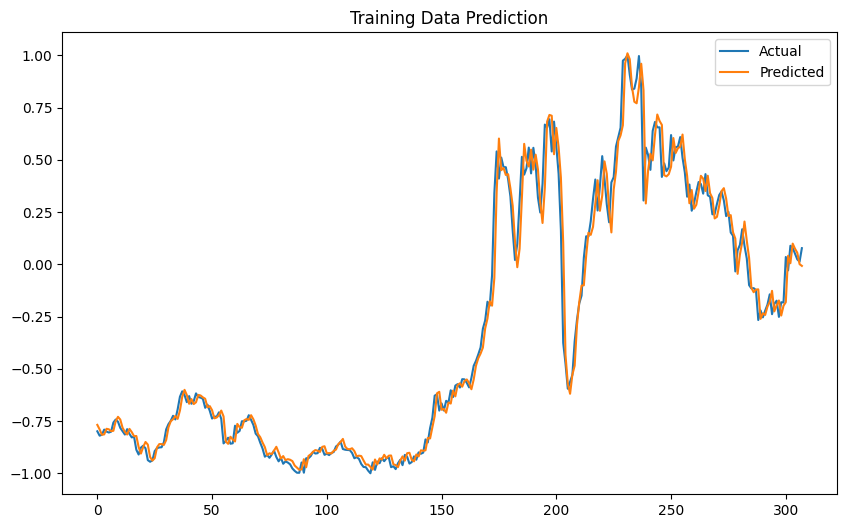

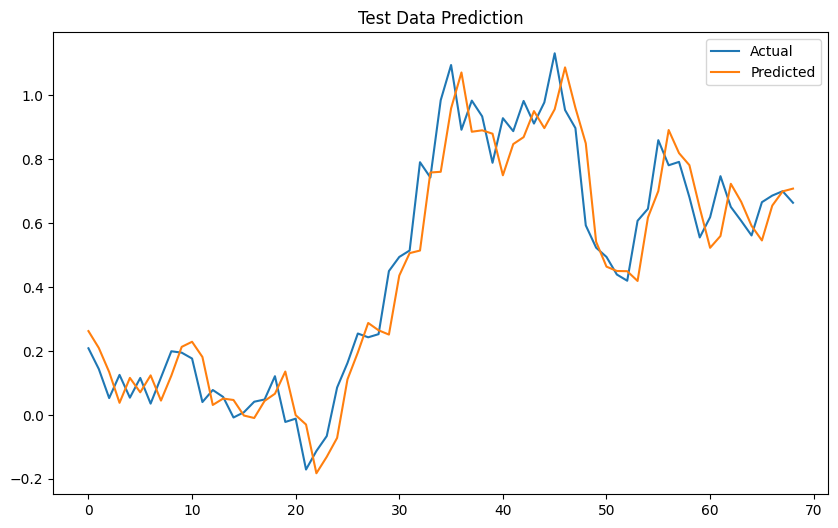

In [ ]:
import matplotlib.pyplot as plt

# Plot actual and predicted values
plt.figure(figsize=(10,6))
plt.plot(y_train, label='Actual')
plt.plot(train_predict, label='Predicted')
plt.title('Training Data Prediction')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title('Test Data Prediction')
plt.legend()
plt.show()


In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms
import random

def evaluate_individual(individual):
    # Unpack individual's parameters
    hidden_layer_sizes, activation, solver = individual

    # Set max_iter based on the solver
    if solver == 'lbfgs':
        max_iter = 2000  # Increase max iterations for lbfgs
    else:
        max_iter = 500  # Default value for other solvers

    # Create the MLPRegressor model with the selected parameters
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                         activation=activation,
                         solver=solver,
                         max_iter=max_iter,
                         random_state=42)

    model.fit(X_train, y_train.ravel())  # Ensure X_train and y_train are defined
    predictions = model.predict(X_test)  # Ensure X_test and y_test are defined
    mse = mean_squared_error(y_test, predictions)
    return (mse,)


# Genetic operators
def mutate_individual(individual):
    mutation_rate = 0.9  # Increase the mutation rate
    if random.random() < mutation_rate:
        # Mutate hidden layer sizes
        individual[0] = random_hidden_layer_sizes()
    if random.random() < mutation_rate:
        # Mutate activation function
        individual[1] = random.choice(["relu", "tanh", "logistic"])
    if random.random() < mutation_rate:
        # Mutate solver
        individual[2] = random.choice(["sgd", "adam", "lbfgs"])
    return individual,


def crossover_individual(ind1, ind2):
    # Two-point crossover or uniform crossover might be more effective
    tools.cxTwoPoint(ind1, ind2)
    return ind1, ind2

def random_hidden_layer_sizes():
    num_layers = random.randint(1, 2)  # Choose between 1 to 3 layers
    return tuple(random.randint(10, 300) for _ in range(num_layers))
# DEAP setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_hidden_layer_sizes", random_hidden_layer_sizes)
toolbox.register("attr_activation", random.choice, ["relu", "tanh"])
toolbox.register("attr_solver", random.choice, ["sgd", "adam",'lbfgs'])
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_hidden_layer_sizes, toolbox.attr_activation, toolbox.attr_solver),
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", crossover_individual)
toolbox.register("mutate", mutate_individual)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=35)
def print_population_details(gen, pop):
    print(f"Generation: {gen}")
    for ind in pop:
        if ind.fitness.valid:  # Check if fitness is valid
            print(f"  Individual Parameters: {ind}, MSE: {ind.fitness.values[0]}")
        else:
            print(f"  Individual Parameters: {ind}, MSE: Fitness not evaluated")
    # Optionally, print the best individual as before
    best_individual = min((ind for ind in pop if ind.fitness.valid), key=lambda x: x.fitness.values[0], default=None)
    if best_individual:
        print(f"  Best Parameters: {best_individual}, MSE: {best_individual.fitness.values[0]}")
    else:
        print("No valid best individual this generation.")


def print_best_of_generation(gen, pop):
    best_individual = min(pop, key=lambda ind: ind.fitness.values[0])
    print(f"Generation: {gen}")
    print(f"  Best Parameters: {best_individual}, MSE: {best_individual.fitness.values[0]}")

def are_similar(ind1, ind2):
    # Compare hidden_layer_sizes by summing their elements
    sum_layers_ind1 = sum(ind1[0])
    sum_layers_ind2 = sum(ind2[0])

    # Simple similarity check based on the sum of hidden layer sizes
    # You might also want to compare activations and solvers if they are different
    layer_similarity = abs(sum_layers_ind1 - sum_layers_ind2) < 50  # Adjust the threshold as needed
    activation_similarity = ind1[1] == ind2[1]
    solver_similarity = ind1[2] == ind2[2]

    # Consider similar if all parameters are deemed similar
    return layer_similarity and activation_similarity and solver_similarity


def shared_fitness(individual, population):
    original_fitness = evaluate_individual(individual)[0]
    penalty = sum(1 for other in population if are_similar(individual, other))
    return (original_fitness * (1 + 0.1 * penalty),)  # Increase fitness by 10% per similar individual

# Define the number of elite individuals
elite_size = 3

# Main Genetic Algorithm Loop
ngen = 20
for gen in range(ngen):
    # Select the elite individuals
    elites = tools.selBest(population, elite_size)

    # Select the rest of the individuals for reproduction
    offspring = toolbox.select(population, len(population) - elite_size)
    offspring = list(map(toolbox.clone, offspring))

    # Apply crossover and mutation on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.5:  # Crossover probability
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < 0.8:  # Mutation probability
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # The population is entirely replaced by the offspring but includes the elites
    population[:] = offspring + elites

    # Print details of the population
    print_population_details(gen, population)

# Final selection of the best individual
best_individual = tools.selBest(population, k=1)[0]
print("Best individual found:")
print(f"  Parameters: {best_individual}")
print(f"  MSE: {best_individual.fitness.values[0]}")



/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Generation: 0
  Individual Parameters: [(275,), 'tanh', 'sgd'], MSE: 0.02436349718614189
  Individual Parameters: [(133, 24), 'tanh', 'adam'], MSE: 0.013118404476829621
  Individual Parameters: [(78,), 'logistic', 'lbfgs'], MSE: 0.01136658322603052
  Individual Parameters: [(138, 185), 'tanh', 'sgd'], MSE: 0.0301248218743358
  Individual Parameters: [(136, 81), 'tanh', 'sgd'], MSE: 0.02506760711446563
  Individual Parameters: [(40,), 'relu', 'adam'], MSE: 0.0386797179206408
  Individual Parameters: [(278,), 'logistic', 'lbfgs'], MSE: 0.011469266351303244
  Individual Parameters: [(70,), 'logistic', 'lbfgs'], MSE: 0.011007460021965088
  Individual Parameters: [(258, 219), 'logistic', 'adam'], MSE: 0.015887302292053145
  Individual Parameters: [(31,), 'tanh', 'sgd'], MSE: 0.02855149840528163
  Individual Parameters: [(213,), 'relu', 'sgd'], MSE: 0.05293068862886312
  Individual Parameters: [(177, 132), 'tanh', 'adam'], MSE: 0.012979301229323502
  Individual Parameters: [(155,), 'tanh', '

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Generation: 3
  Individual Parameters: [(18, 300), 'tanh', 'adam'], MSE: 0.014937758332778196
  Individual Parameters: [(142, 279), 'logistic', 'lbfgs'], MSE: 0.01218205895332933
  Individual Parameters: [(161, 223), 'tanh', 'sgd'], MSE: 0.027558496999888694
  Individual Parameters: [(300, 299), 'tanh', 'sgd'], MSE: 0.028312095839347625
  Individual Parameters: [(31, 13), 'relu', 'lbfgs'], MSE: 0.06296949104741574
  Individual Parameters: [(176,), 'relu', 'adam'], MSE: 0.017354043606531807
  Individual Parameters: [(50, 95), 'tanh', 'sgd'], MSE: 0.030129456657328718
  Individual Parameters: [(70,), 'logistic', 'lbfgs'], MSE: 0.011007460021965088
  Individual Parameters: [(96, 129), 'logistic', 'lbfgs'], MSE: 0.011196748654367383
  Individual Parameters: [(274,), 'logistic', 'lbfgs'], MSE: 0.011047957432845722
  Individual Parameters: [(108, 196), 'relu', 'lbfgs'], MSE: 0.034417051454958554
  Individual Parameters: [(103,), 'tanh', 'adam'], MSE: 0.018544840353083562
  Individual Paramet

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Generation: 4
  Individual Parameters: [(270, 178), 'logistic', 'sgd'], MSE: 0.7357496764104404
  Individual Parameters: [(123, 31), 'logistic', 'adam'], MSE: 0.02514789947256707
  Individual Parameters: [(186,), 'tanh', 'lbfgs'], MSE: 0.011633052036981013
  Individual Parameters: [(70,), 'logistic', 'lbfgs'], MSE: 0.011007460021965088
  Individual Parameters: [(45,), 'tanh', 'lbfgs'], MSE: 0.0474572502876731
  Individual Parameters: [(27,), 'tanh', 'adam'], MSE: 0.020531769451400922
  Individual Parameters: [(224,), 'tanh', 'adam'], MSE: 0.01395631992665178
  Individual Parameters: [(130,), 'tanh', 'sgd'], MSE: 0.028528474500467055
  Individual Parameters: [(278,), 'logistic', 'lbfgs'], MSE: 0.011469266351303244
  Individual Parameters: [(284, 300), 'relu', 'lbfgs'], MSE: 0.036790126369076546
  Individual Parameters: [(259,), 'logistic', 'sgd'], MSE: 0.06679754480635437
  Individual Parameters: [(96, 129), 'logistic', 'sgd'], MSE: 0.7721729826805245
  Individual Parameters: [(70,), 'l

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Generation: 5
  Individual Parameters: [(70,), 'logistic', 'lbfgs'], MSE: 0.011007460021965088
  Individual Parameters: [(186,), 'tanh', 'lbfgs'], MSE: 0.011633052036981013
  Individual Parameters: [(20, 227), 'relu', 'lbfgs'], MSE: 0.027914649774572878
  Individual Parameters: [(70,), 'logistic', 'lbfgs'], MSE: 0.011007460021965088
  Individual Parameters: [(60, 274), 'tanh', 'adam'], MSE: 0.013164069649700193
  Individual Parameters: [(190, 129), 'tanh', 'lbfgs'], MSE: 0.01195657364091046
  Individual Parameters: [(222,), 'tanh', 'lbfgs'], MSE: 0.011947633347704366
  Individual Parameters: [(189, 272), 'logistic', 'lbfgs'], MSE: 0.013593168615124308
  Individual Parameters: [(189, 245), 'relu', 'lbfgs'], MSE: 0.033988768731035846
  Individual Parameters: [(274,), 'relu', 'adam'], MSE: 0.014646848327959903
  Individual Parameters: [(12, 121), 'relu', 'adam'], MSE: 0.02208721557123543
  Individual Parameters: [(118,), 'logistic', 'adam'], MSE: 0.04306276657789418
  Individual Parameter

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Generation: 6
  Individual Parameters: [(70,), 'tanh', 'adam'], MSE: 0.023561038135714137
  Individual Parameters: [(190, 129), 'logistic', 'lbfgs'], MSE: 0.014465573291577537
  Individual Parameters: [(257, 173), 'relu', 'sgd'], MSE: 0.049883456537884396
  Individual Parameters: [(122, 246), 'logistic', 'lbfgs'], MSE: 0.011333248480573245
  Individual Parameters: [(119,), 'relu', 'lbfgs'], MSE: 0.05150967594482304
  Individual Parameters: [(41,), 'tanh', 'lbfgs'], MSE: 0.04097153892139576
  Individual Parameters: [(42,), 'tanh', 'lbfgs'], MSE: 0.041956961853557996
  Individual Parameters: [(70,), 'tanh', 'lbfgs'], MSE: 0.047502006451517045
  Individual Parameters: [(190, 129), 'tanh', 'lbfgs'], MSE: 0.01195657364091046
  Individual Parameters: [(54,), 'tanh', 'sgd'], MSE: 0.03821405464071825
  Individual Parameters: [(105, 136), 'relu', 'sgd'], MSE: 0.06511275682906911
  Individual Parameters: [(65, 141), 'tanh', 'lbfgs'], MSE: 0.05109770424553395
  Individual Parameters: [(116, 14), 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Generation: 8
  Individual Parameters: [(40,), 'relu', 'adam'], MSE: 0.0386797179206408
  Individual Parameters: [(195,), 'tanh', 'adam'], MSE: 0.019758500846525213
  Individual Parameters: [(140,), 'logistic', 'lbfgs'], MSE: 0.011722136850000401
  Individual Parameters: [(214,), 'logistic', 'lbfgs'], MSE: 0.010944891043501832
  Individual Parameters: [(154, 188), 'logistic', 'sgd'], MSE: 0.5329443132169353
  Individual Parameters: [(248, 227), 'relu', 'adam'], MSE: 0.014629960016736915
  Individual Parameters: [(138,), 'logistic', 'lbfgs'], MSE: 0.010927992020761472
  Individual Parameters: [(11, 214), 'tanh', 'lbfgs'], MSE: 0.032767537289371
  Individual Parameters: [(129, 263), 'logistic', 'lbfgs'], MSE: 0.011010796115461796
  Individual Parameters: [(64, 182), 'tanh', 'lbfgs'], MSE: 0.056864986243635306
  Individual Parameters: [(90,), 'logistic', 'lbfgs'], MSE: 0.011129731084920491
  Individual Parameters: [(75,), 'logistic', 'adam'], MSE: 0.046355329440125895
  Individual Paramet

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Generation: 16
  Individual Parameters: [(215,), 'relu', 'adam'], MSE: 0.015303860490155844
  Individual Parameters: [(111, 45), 'logistic', 'sgd'], MSE: 0.801502996302095
  Individual Parameters: [(257, 263), 'tanh', 'sgd'], MSE: 0.019698901232283857
  Individual Parameters: [(178, 40), 'logistic', 'sgd'], MSE: 0.8587129211559502
  Individual Parameters: [(75,), 'logistic', 'lbfgs'], MSE: 0.010821745280595338
  Individual Parameters: [(181, 77), 'logistic', 'adam'], MSE: 0.019333093536870922
  Individual Parameters: [(75,), 'logistic', 'lbfgs'], MSE: 0.010821745280595338
  Individual Parameters: [(172,), 'logistic', 'lbfgs'], MSE: 0.010963434312648644
  Individual Parameters: [(107, 249), 'tanh', 'lbfgs'], MSE: 0.012186721844942917
  Individual Parameters: [(77,), 'logistic', 'lbfgs'], MSE: 0.011102016352925256
  Individual Parameters: [(264,), 'relu', 'adam'], MSE: 0.013539614304380882
  Individual Parameters: [(244, 229), 'tanh', 'adam'], MSE: 0.010985167449197027
  Individual Param

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Generation: 17
  Individual Parameters: [(274, 56), 'relu', 'adam'], MSE: 0.013186568904461116
  Individual Parameters: [(75,), 'relu', 'adam'], MSE: 0.025081296182594054
  Individual Parameters: [(229, 97), 'relu', 'adam'], MSE: 0.013045461091027983
  Individual Parameters: [(97, 259), 'relu', 'lbfgs'], MSE: 0.04766084631108154
  Individual Parameters: [(52,), 'relu', 'lbfgs'], MSE: 0.041605791770012945
  Individual Parameters: [(25, 38), 'logistic', 'lbfgs'], MSE: 0.0121784211948799
  Individual Parameters: [(41, 269), 'logistic', 'adam'], MSE: 0.019683632943411033
  Individual Parameters: [(234,), 'relu', 'lbfgs'], MSE: 0.04627057837200217
  Individual Parameters: [(164, 239), 'tanh', 'adam'], MSE: 0.013056865917420047
  Individual Parameters: [(75,), 'relu', 'adam'], MSE: 0.025081296182594054
  Individual Parameters: [(75,), 'logistic', 'lbfgs'], MSE: 0.010821745280595338
  Individual Parameters: [(228,), 'tanh', 'sgd'], MSE: 0.02910960713239594
  Individual Parameters: [(180,), 'l

In [ ]:
from sklearn.neural_network import MLPRegressor  # or MLPClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error  # or accuracy_score for classification
import numpy as np
import math

# Example data: replace with your actual dataset
X = X_train  # Feature set
y = y_train  # Target variable

# Initialize your ANN model with predefined parameters
model = MLPRegressor(hidden_layer_sizes=(75,), activation='logistic', solver='lbfgs', max_iter=1000, random_state=42)

# Number of splits for TimeSeriesSplit
n_splits = 10
tscv = TimeSeriesSplit(n_splits=n_splits)

# To store the scores for each fold
scores = []

fold = 1  # To track the fold number
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE for the current fold
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    scores.append(rmse)
    # Print the RMSE for the current fold
    print(f"Fold {fold}: RMSE = {rmse}")

    # Increment the fold number
    fold += 1

# Optionally, if you want to keep track of scores to print or analyze later:


# If you uncomment the above line, you can also print average RMSE after the loop:
print("Average RMSE:", np.mean(scores))


Fold 1: RMSE = 0.07430570516957641
Fold 2: RMSE = 0.05057669391572022
Fold 3: RMSE = 0.04440451170623237
Fold 4: RMSE = 0.03343932903200022
Fold 5: RMSE = 0.028554818156650546
Fold 6: RMSE = 0.0546008092604122
Fold 7: RMSE = 0.2243385328790035
Fold 8: RMSE = 0.1959316305504858
Fold 9: RMSE = 0.1345637230200743
Fold 10: RMSE = 0.18968756151649982
Average RMSE: 0.10304033152066554


run 1:

```
Fold 1: RMSE = 0.07266180207801912
Fold 2: RMSE = 0.04843576718049978
Fold 3: RMSE = 0.0381885913922833
Fold 4: RMSE = 0.030015891603175075
Fold 5: RMSE = 0.06148223159115172
Fold 6: RMSE = 0.22843061331130507
Fold 7: RMSE = 0.15644908774052466
Fold 8: RMSE = 0.17232327213031903
Fold 9: RMSE = 0.08454492376324635
Fold 10: RMSE = 0.078366262393781
Average RMSE: 0.0970898443184305
```

run 2:

```
Fold 1: RMSE = 0.07523149313340927
Fold 2: RMSE = 0.05095132436821868
Fold 3: RMSE = 0.045344732649377315
Fold 4: RMSE = 0.03156333966962533
Fold 5: RMSE = 0.048841145353170023
Fold 6: RMSE = 0.12363398201600688
Fold 7: RMSE = 0.20157860544075062
Fold 8: RMSE = 0.12701283785627193
Fold 9: RMSE = 0.18412750531688368
Fold 10: RMSE = 0.08662940712681305
Average RMSE: 0.09749143729305268
```
run 3:

```
Fold 1: RMSE = 0.07430570516957641
Fold 2: RMSE = 0.05057669391572022
Fold 3: RMSE = 0.04440451170623237
Fold 4: RMSE = 0.03343932903200022
Fold 5: RMSE = 0.028554818156650546
Fold 6: RMSE = 0.0546008092604122
Fold 7: RMSE = 0.2243385328790035
Fold 8: RMSE = 0.1959316305504858
Fold 9: RMSE = 0.1345637230200743
Fold 10: RMSE = 0.18968756151649982
Average RMSE: 0.10304033152066554
```





